**HR Analytics: Job Change of Data Scientists** <br/>
Link Dataset : https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists <br/>

Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut ilmuwan data di antara orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaan. Banyak orang mendaftar untuk pelatihan mereka. Perusahaan ingin mengetahui kandidat mana yang benar-benar ingin bekerja untuk perusahaan setelah pelatihan atau mencari pekerjaan baru karena membantu mengurangi biaya dan waktu serta kualitas pelatihan atau perencanaan kursus dan kategorisasi kandidat. Dataset ini dirancang untuk memahami faktor-faktor yang menyebabkan seseorang meninggalkan pekerjaan saat ini untuk penelitian SDM juga. Dengan model yang menggunakan kredensial, demografi, data pengalaman saat ini, Anda akan memprediksi kemungkinan seorang kandidat untuk mencari pekerjaan baru atau akan bekerja untuk perusahaan, serta menafsirkan faktor-faktor yang memengaruhi keputusan karyawan. <br/>
 <br />
**Features**
1.   enrollee_id : ID unik untuk kandidat
2.   city: Kode kota
1.   city_ development _index : Indeks pembangunan kota (berskala)
2.   gender: Jenis kelamin kandidat
1.   relevent_experience: Pengalaman kandidat yang relevan
2.   enrolled_university: Jenis program Universitas yang terdaftar jika ada
1.   education_level: Tingkat pendidikan kandidat
2.   major_discipline : Pendidikan disiplin utama kandidat
1.   experience: Pengalaman kandidat (dalam tahun)
2.   company_size: Jumlah karyawan di perusahaan pemberi kerja saat ini
1.   company_type : Jenis perusahaan pekerjaan kandidat
2.   lastnewjob: Selisih dalam tahun antara pekerjaan sebelumnya dan pekerjaan saat ini 
1.   training_hours: Waktu pelatihan yang telah diselesaikan
2.   target: 0 – Tidak menginginkan pergantian pekerjaan, 1 – Menginginkan pergantian pekerjaan








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

**DATA PREPARATION**

In [ ]:
df = pd.read_csv('https://masadamsahid.github.io/DTS-HR-Analytics-Data-Scientist-Job-Change/aug_train.csv')
#df = pd.read_csv('aug_train.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.describe(include="all")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [ ]:
# print("Unique Values in 'City'", list(df.city.unique()))
# print("Unique Values in 'Gender'", list(df.gender.unique()))
# print("Unique Values in 'Relevant Experience'", list(df.relevent_experience.unique()))
# print("Unique Values in 'Enrolled University'", list(df.enrolled_university.unique()))
# print("Unique Values in 'Education Level'", list(df.education_level.unique()))
# print("Unique Values in 'Major Discipline'", list(df.major_discipline.unique()))
# print("Unique Values in 'Experience'", list(df.experience.unique()))
# print("Unique Values in 'Company Size'", list(df.company_size.unique()))
# print("Unique Values in 'Company Type'", list(df.company_type.unique()))
# print("Unique Values in 'Last New Job'", list(df.last_new_job.unique()))

for column in df:
  print("Unique Values in", column, list(df[column].unique()))

Unique Values in enrollee_id [8949, 29725, 11561, 33241, 666, 21651, 28806, 402, 27107, 699, 29452, 23853, 25619, 5826, 8722, 6588, 4167, 5764, 2156, 11399, 31972, 19061, 6491, 7041, 22767, 14505, 17139, 28476, 21538, 10408, 14928, 22293, 4324, 26966, 26494, 4866, 12726, 10164, 8612, 24659, 2547, 13854, 31654, 13643, 5590, 22452, 9006, 25987, 4476, 25103, 5568, 2195, 30533, 28512, 1023, 12253, 25296, 13238, 13478, 18578, 29975, 26516, 24690, 8433, 9572, 5878, 25695, 9645, 12730, 4830, 20970, 17271, 12731, 10908, 29117, 3686, 22683, 22134, 31765, 31449, 5987, 21762, 22070, 25413, 5902, 28403, 30937, 28751, 29290, 32401, 19128, 29036, 16869, 10497, 18099, 12081, 7364, 11184, 7016, 8695, 6172, 14672, 18257, 24493, 1180, 28627, 8168, 10473, 25349, 5220, 4789, 11338, 27963, 8571, 16303, 20576, 32966, 21199, 18819, 14199, 7666, 13915, 10555, 16040, 32826, 13253, 15637, 28074, 23012, 16110, 3921, 24530, 1924, 32776, 1907, 23947, 3116, 24829, 30488, 1265, 22098, 13342, 24608, 20081, 24796, 777

**DATA CLEANING**

In [ ]:
# Change data type target
df['target'] = df['target'].apply(int)

In [ ]:
# Replace 'gender' column attribute (Other)
indexname = df[df['gender'] == 'Other'].index
df.drop(index=indexname, inplace= True)

In [ ]:
df[df['gender']=='Other']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [ ]:
# Rename column 'relevent_experience'
df = df.rename(columns={'relevent_experience' : 'relevant_experience'})

In [ ]:
# Rename atribute column 'relevent_experience'
df['relevant_experience'].replace({
    "Has relevent experience":"Has relevant experience",
    "No relevent experience":"No relevant experience"
    },inplace=True
)

In [ ]:
# Rename atribute column 'enrolled_university'
df['relevant_experience'].replace({
    "Full time course":"full_time",
    "Part time course":"part_time"
    }, inplace=True
)

In [ ]:
# Rename atribute column 'company_size'
df['company_size'].replace({"10000+":">10000"}, inplace=True)

In [ ]:
# Replace data company size (10/49)
indexname = df[df['company_size'] == '10/49'].index
df.drop(index=indexname, inplace=True)

In [ ]:
df[df['company_size'] == '10/49']

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [ ]:
# Rename atribute column 'last_new_job'
df['last_new_job'].replace({"never":"0"}, inplace=True)

In [ ]:
# Count duplicate data
df.duplicated().sum()

0

In [ ]:
# Count missing value
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4178
relevant_experience          0
enrolled_university        353
education_level            429
major_discipline          2620
experience                  58
company_size              5859
company_type              5954
last_new_job               388
training_hours               0
target                       0
dtype: int64

In [ ]:
# Percentage of missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

enrollee_id - 0%
city - 0%
city_development_index - 0%
gender - 24%
relevant_experience - 0%
enrolled_university - 2%
education_level - 2%
major_discipline - 15%
experience - 0%
company_size - 33%
company_type - 34%
last_new_job - 2%
training_hours - 0%
target - 0%


In [ ]:
# Analyze numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['enrollee_id' 'city_development_index' 'training_hours' 'target']


In [ ]:
# Analyze non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['city' 'gender' 'relevant_experience' 'enrolled_university'
 'education_level' 'major_discipline' 'experience' 'company_size'
 'company_type' 'last_new_job']


In [ ]:
# Replace missing value (non-numeric cols with modus)
for col in non_numeric_cols:
  missing = df[col].isnull()
  num_missing = np.sum(missing)

  if num_missing > 0:
    print('Inputting missing values for: {}'.format(col))
    df['{}_ismissing'.format(col)] = missing
    
    top = df[col].describe()['top']
    df[col] = df[col].fillna(top)

Inputting missing values for: gender
Inputting missing values for: enrolled_university
Inputting missing values for: education_level
Inputting missing values for: major_discipline
Inputting missing values for: experience
Inputting missing values for: company_size
Inputting missing values for: company_type
Inputting missing values for: last_new_job


In [ ]:
# Check missing value
df.isnull().sum()

enrollee_id                      0
city                             0
city_development_index           0
gender                           0
relevant_experience              0
enrolled_university              0
education_level                  0
major_discipline                 0
experience                       0
company_size                     0
company_type                     0
last_new_job                     0
training_hours                   0
target                           0
gender_ismissing                 0
enrolled_university_ismissing    0
education_level_ismissing        0
major_discipline_ismissing       0
experience_ismissing             0
company_size_ismissing           0
company_type_ismissing           0
last_new_job_ismissing           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17508 entries, 0 to 19157
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   enrollee_id                    17508 non-null  int64  
 1   city                           17508 non-null  object 
 2   city_development_index         17508 non-null  float64
 3   gender                         17508 non-null  object 
 4   relevant_experience            17508 non-null  object 
 5   enrolled_university            17508 non-null  object 
 6   education_level                17508 non-null  object 
 7   major_discipline               17508 non-null  object 
 8   experience                     17508 non-null  object 
 9   company_size                   17508 non-null  object 
 10  company_type                   17508 non-null  object 
 11  last_new_job                   17508 non-null  object 
 12  training_hours                 17508 non-null 

**CHECK OUTLIER**

In [ ]:
# Check outlier for numeric columns
for col in numeric_cols:
  print("Statistik Deskriptif", col, '\n', df[col].describe(), '\n')

Statistik Deskriptif enrollee_id 
 count    17508.000000
mean     16864.378970
std       9606.191971
min          1.000000
25%       8532.500000
50%      17009.500000
75%      25149.250000
max      33380.000000
Name: enrollee_id, dtype: float64 

Statistik Deskriptif city_development_index 
 count    17508.000000
mean         0.829715
std          0.122745
min          0.448000
25%          0.742000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64 

Statistik Deskriptif training_hours 
 count    17508.000000
mean        65.259424
std         59.892327
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64 

Statistik Deskriptif target 
 count    17508.000000
mean         0.250457
std          0.433289
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: floa

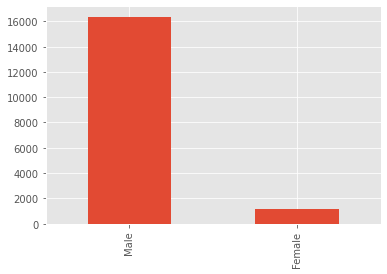

In [ ]:
# Check outlier for non-numeric columns
df['gender'].value_counts().plot.bar()

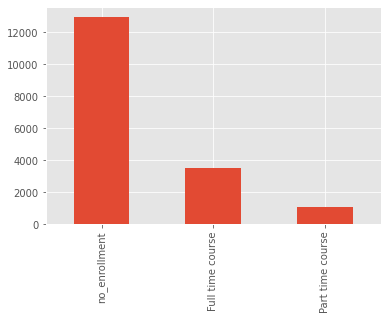

In [ ]:
# Check outlier for non-numeric columns
df['enrolled_university'].value_counts().plot.bar()

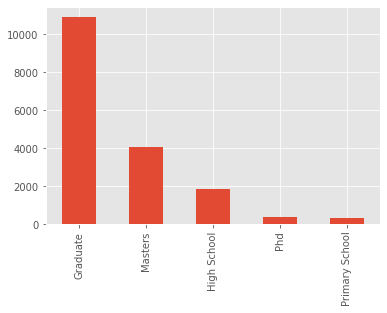

In [ ]:
# Check outlier for non-numeric columns
df['education_level'].value_counts().plot.bar()

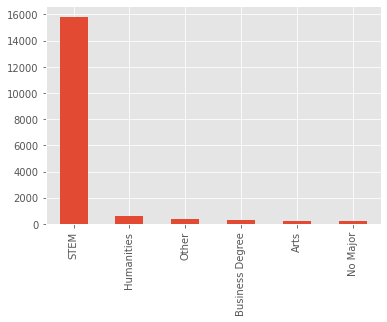

In [ ]:
# Check outlier for non-numeric columns
df['major_discipline'].value_counts().plot.bar()

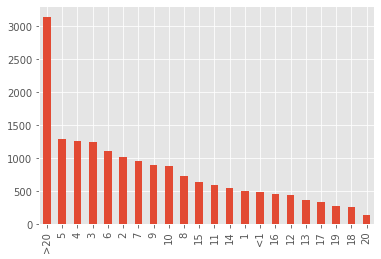

In [ ]:
# Check outlier for non-numeric columns
df['experience'].value_counts().plot.bar()

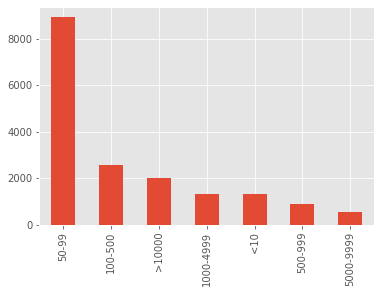

In [ ]:
# Check outlier for non-numeric columns
df['company_size'].value_counts().plot.bar()

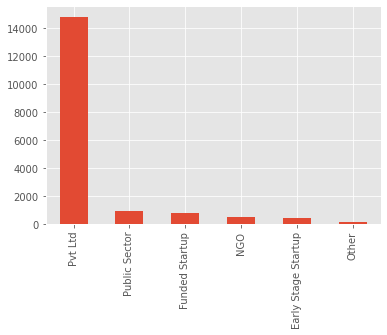

In [ ]:
# Check outlier for non-numeric columns
df['company_type'].value_counts().plot.bar()

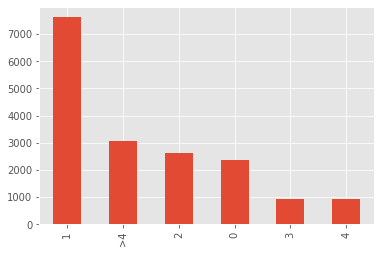

In [ ]:
# Check outlier for non-numeric columns
df['last_new_job'].value_counts().plot.bar()

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_ismissing,enrolled_university_ismissing,education_level_ismissing,major_discipline_ismissing,experience_ismissing,company_size_ismissing,company_type_ismissing,last_new_job_ismissing
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1,False,False,False,False,False,True,True,False
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,False,False,False,False,False,False,False,False
2,11561,city_21,0.624,Male,No relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0,True,False,False,False,False,True,True,False
3,33241,city_115,0.789,Male,No relevant experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,0,52,1,True,True,False,False,False,True,False,False
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevant experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1,False,False,False,False,False,True,True,False
19154,31398,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1,False,False,False,False,False,True,True,False
19155,24576,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0,False,False,False,False,False,False,False,False
19156,5756,city_65,0.802,Male,Has relevant experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0,False,False,False,True,False,False,False,False


**EXPLORATORY DATA ANALYSIS**

1. Berapa perbandingan orang yang ingin pindah kerja dengan yang tidak ?

In [ ]:
num_change_job = df[df['target']==1].count()['enrollee_id']
num_no_change_job = df[df['target']==0].count()['enrollee_id']

In [ ]:
print(num_change_job, num_no_change_job)

4385 13123


Text(0.5, 1.2, 'Persentase perbandingan kandidat yang ingin pindah kerja dengan yang tidak')

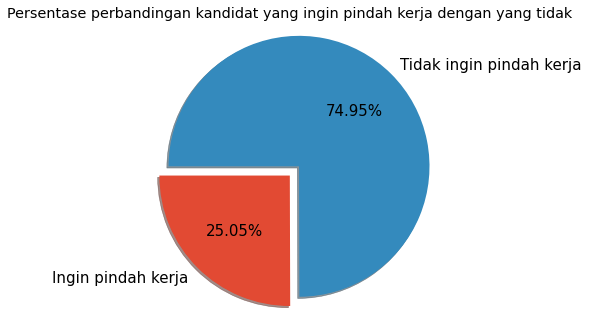

In [ ]:
label_names = ['Ingin pindah kerja', 'Tidak ingin pindah kerja']
data = [num_change_job, num_no_change_job]

explode = (0, 0.15)
plt.axis('equal')
plt.pie(data, radius=1.5, shadow=True, labels=label_names, 
        explode= explode, startangle=180, 
        autopct='%0.2f%%', textprops={"fontsize":15})
plt.title("Persentase perbandingan kandidat yang ingin pindah kerja dengan yang tidak", y=1.2)

2. Perbandingan pria dan wanita yang ingin pindah kerja

In [ ]:
x = df.groupby(['gender', 'target']).count()
x.head()

enrollee_id  ...  last_new_job_ismissing
gender target               ...                        
Female 0               836  ...                     836
       1               301  ...                     301
Male   0             12287  ...                   12287
       1              4084  ...                    4084

[4 rows x 20 columns]

Text(0, 0.5, 'Jumlah kandidat')

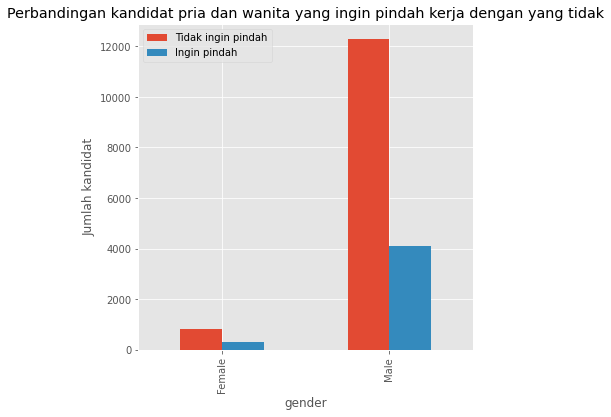

In [ ]:
x['enrollee_id'].unstack().plot(kind="bar", stacked=False,
                                figsize=(6,6), grid=True)
plt.title("Perbandingan kandidat pria dan wanita yang ingin pindah kerja dengan yang tidak")
plt.legend(["Tidak ingin pindah", "Ingin pindah"])
plt.ylabel("Jumlah kandidat")

3. Tingkat keinginan pindah berdasarkan tingkat pendidikan

In [ ]:
no_pindah = df['target'] == 0
ingin_pindah = df['target'] == 1

tidak_pindah = df[no_pindah]

pindah = df[ingin_pindah]

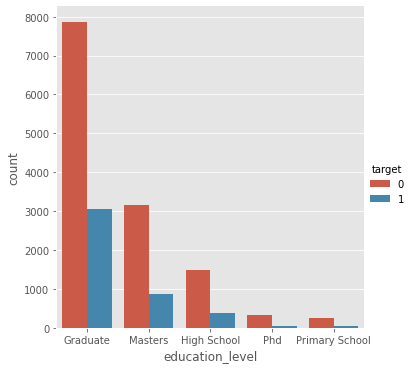

In [ ]:
sns.catplot(data=df, x='education_level', kind='count', hue='target')
plt.show()

In [ ]:
all_count = df['enrollee_id'].count()


grad = df.loc[(df["education_level"]=='Graduate') & (df["target"]==1)]["enrollee_id"].count() 
mast = df.loc[(df["education_level"]=='Masters') & (df["target"]==1)]["enrollee_id"].count() 
hs = df.loc[(df["education_level"]=='High School') & (df["target"]==1)]["enrollee_id"].count() 
Phd = df.loc[(df["education_level"]=='Phd') & (df["target"]==1)]["enrollee_id"].count() 
oth = df.loc[(df["education_level"]=='Other') & (df["target"]==1)]["enrollee_id"].count() 
ps = df.loc[(df["education_level"]=='Primary School') & (df["target"]==1)]["enrollee_id"].count() 

# #calculate percentages
graduate = round(grad*100 / all_count,2) 
masters = round(mast*100 / all_count,2) 
highschool = round(hs*100 / all_count,2) 
phd = round(Phd*100 / all_count,2) 
other = round(oth*100 / all_count,2) 
primschool = round(ps*100 / all_count,2) 

print('Persentase keinginan pindah berdasarkan tingkat pendidikan dibanding seluruh data:')
print('- Graduate: ', graduate, '%', sep='')
print('- Masters: ', masters, '%', sep='')
print('- High School: ', highschool, '%', sep='')
print('- Phd: ', phd, '%', sep='')
print('- Other: ',other, '%', sep='')
print('- Primary School: ', primschool, '%', sep='')

Persentase keinginan pindah berdasarkan tingkat pendidikan dibanding seluruh data:
- Graduate: 17.41%
- Masters: 4.97%
- High School: 2.14%
- Phd: 0.31%
- Other: 0.0%
- Primary School: 0.22%


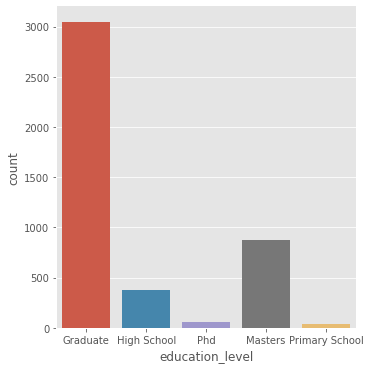

In [ ]:
sns.catplot(data=pindah, x='education_level', kind='count')
plt.show()

In [ ]:
all_count = pindah['enrollee_id'].count()


grad = pindah.loc[(pindah["education_level"]=='Graduate')]["enrollee_id"].count() 
mast = pindah.loc[(pindah["education_level"]=='Masters')]["enrollee_id"].count() 
hs = pindah.loc[(pindah["education_level"]=='High School')]["enrollee_id"].count() 
Phd = pindah.loc[(pindah["education_level"]=='Phd')]["enrollee_id"].count() 
oth = pindah.loc[(pindah["education_level"]=='Other')]["enrollee_id"].count() 
ps = pindah.loc[(pindah["education_level"]=='Primary School')]["enrollee_id"].count() 

grad = pindah.loc[(pindah["education_level"]=='Graduate')]["enrollee_id"].count()

#calculate percentages
graduate = round(grad*100 / all_count,2) 
masters = round(mast*100 / all_count,2) 
highschool = round(hs*100 / all_count,2) 
phd = round(Phd*100 / all_count,2) 
other = round(oth*100 / all_count,2) 
primschool = round(ps*100 / all_count,2) 

print('Persentase keinginan pindah berdasarkan tingkat pendidikan:')
print('- Graduate: ', graduate, '%', sep='')
print('- Masters: ', masters, '%', sep='')
print('- High School: ', highschool, '%', sep='')
print('- Phd: ', phd, '%', sep='')
print('- Other: ',other, '%', sep='')
print('- Primary School: ', primschool, '%', sep='')

Persentase keinginan pindah berdasarkan tingkat pendidikan:
- Graduate: 69.53%
- Masters: 19.84%
- High School: 8.53%
- Phd: 1.23%
- Other: 0.0%
- Primary School: 0.87%


4. Sebaran jam pelatihan untuk tiap kategori

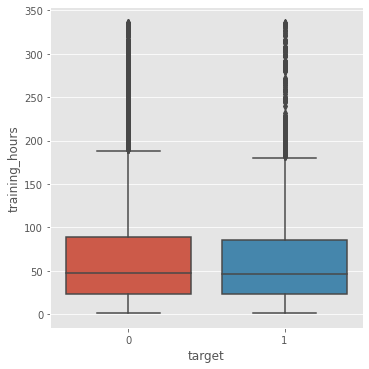

In [ ]:
sns.catplot(x='target', data=df, y='training_hours', kind='box')
plt.show()

Berdasar sebaran data di atas, tampak bahwa tidak terdapat perbedaan signifikan pada training_hours antara mereka yang ingin pindah kerja dengan yg tidak

5. Sebaran city development index untuk tiap kategori

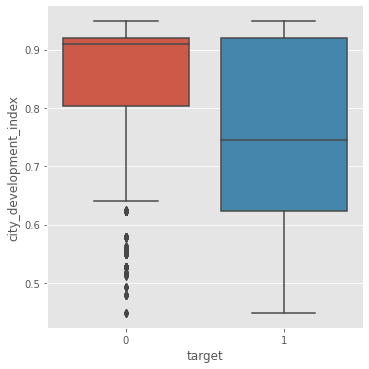

In [ ]:
sns.catplot(x='target', data=df, y='city_development_index', kind='box')
plt.show()

Berdasar sebaran data di atas, tampak bahwa  terdapat perbedaan signifikan pada city_development_index antara mereka yang ingin pindah kerja dengan yg tidak. Tampak bahwa persebaran data pada mereka yang ingin pindah kerja lebih luas daripada yang tidak ingin

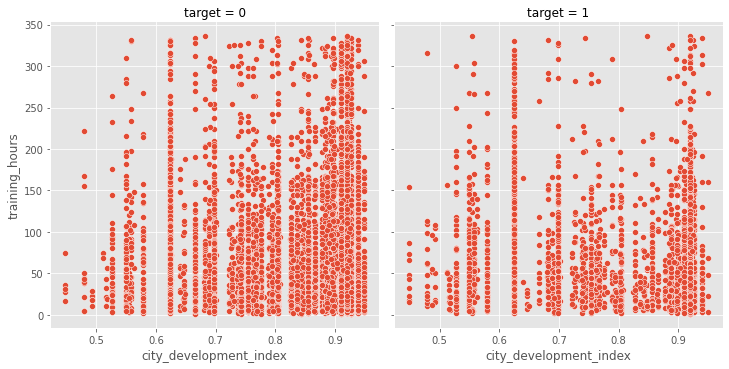

In [ ]:
sns.relplot(y="training_hours", x="city_development_index", data=df, kind="scatter", col="target")
plt.show()

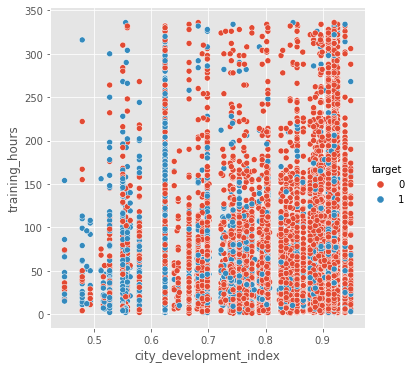

In [ ]:
sns.relplot(y="training_hours", x="city_development_index", data=df, kind="scatter", hue="target")
plt.show()

6. Perbandingan keinginan pindah kerja berdasarkan company size

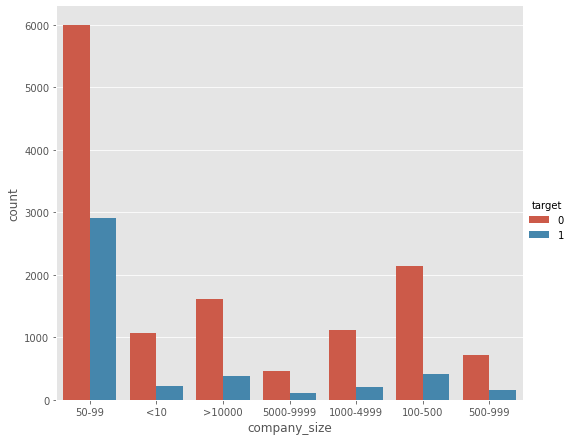

In [ ]:
sns.catplot(data=df, x='company_size', kind='count', hue='target', height=6, aspect=1.2)
plt.show()

7. Perbandingan keinginan pindah kerja berdasarkan company type

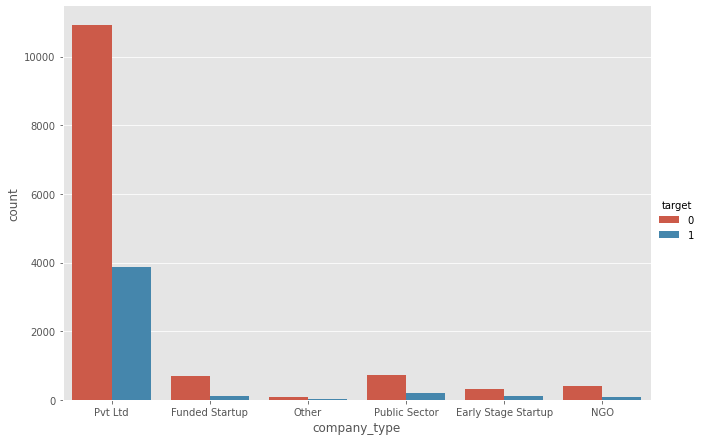

In [ ]:
sns.catplot(data=df, x='company_type', kind='count', hue='target', height=6, aspect=3)
plt.show()

8. Perbandingan keinginan pindah kerja berdasarkan relevant experience

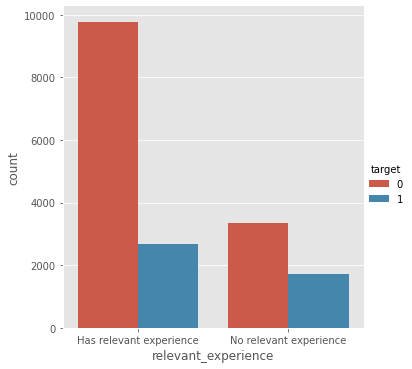

In [ ]:
sns.catplot(data=df, x='relevant_experience', kind='count', hue='target')
plt.show()

9. Perbandingan keinginan pindah kerja berdasarkan selisih tahun pekerjaan sebelumnya dengan pekerjaan saat ini

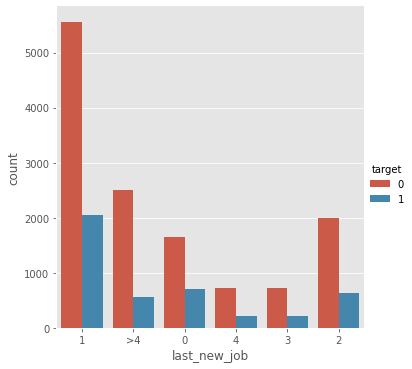

In [ ]:
sns.catplot(data=df, x='last_new_job', kind='count', hue='target')
plt.show()